In [1]:
from popsborder.scenarios import run_scenarios
from popsborder.inputs import load_configuration, load_scenario_table
from popsborder.outputs import save_scenario_result_to_pandas

In [2]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
from pathlib import Path
datadir = Path("data")
basic_config = load_configuration(datadir / "dynamic_skip_lot_config.yml")
scenario_table = load_scenario_table(datadir / "dynamic_skip_lot_scenarios.csv")

In [4]:
results = run_scenarios(
    config=basic_config,
    scenario_table=scenario_table,
    seed=42,
    num_simulations=1,
    num_consignments=1000,
)

Running scenario: No restating (base start)
Running scenario: Restating (base start)
Running scenario: Challanging restating
Running scenario: No restating with compliant start
Running scenario: Restating with compliant start
Running scenario: Challanging restating with compliant start
Running scenario: High clearance number


In [5]:
df = save_scenario_result_to_pandas(
    results,
    result_columns=[
        "missing",
        "true_contamination_rate",
        "max_missed_contamination_rate",
        "avg_missed_contamination_rate",
        "max_intercepted_contamination_rate",
        "avg_intercepted_contamination_rate",
        "avg_boxes_opened_completion",
        "avg_boxes_opened_detection",
        "avg_items_inspected_completion",
        "avg_items_inspected_detection",
        "pct_items_inspected_detection",
        "pct_contaminant_unreported_if_detection",
    ],
)

<Axes: xlabel='name'>

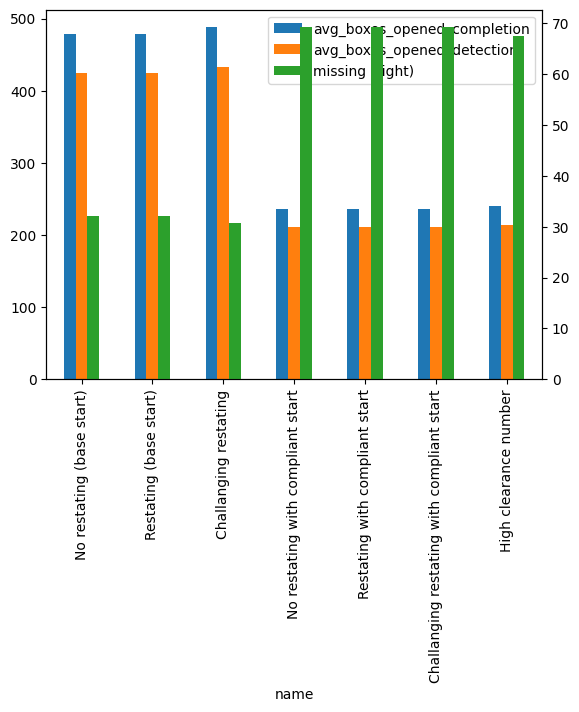

In [6]:
df.plot(kind="bar", x="name", y=["avg_boxes_opened_completion","avg_boxes_opened_detection", "missing"], secondary_y=["missing"])